# GoodReads Book Reviews

**What can we learn from data describing online book reviews from 2001 to today?**

This dataset includes information about reviews and ratings of books collected from the online site goodreads.com. It includes data describing average ratings, number of ratings, number of pages, and more. The following notebook explores several questions relevant to online book reviews and insights available from this dataset.

In [2]:
# import packages and read in the dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('books.csv')

In [3]:
# some cleaning and setting of datatypes to help plotting

# drop a few observations with errors
df.drop(index=[4701, 5876, 8978], inplace=True)

# fix a column name issue
df['num_pages'] = df['  num_pages']
df.drop(columns=['  num_pages'], inplace=True)

# set datatypes
df['average_rating'] = pd.to_numeric(df['average_rating'])
df['num_pages'] = pd.to_numeric(df['num_pages'])
df['publication_date'] = pd.to_datetime(df['publication_date'], errors='coerce')

## Average Ratings

Question: How do people rate books online?

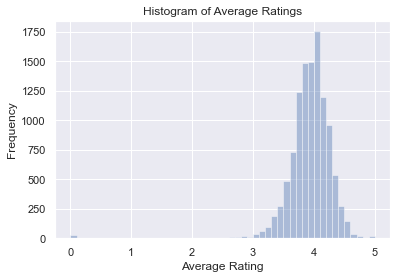

In [4]:
sns.set()
_ = sns.distplot(df['average_rating'], kde=False)
_ = plt.xlabel('Average Rating')
_ = plt.ylabel('Frequency')
_ = plt.title('Histogram of Average Ratings')
plt.show()

The average book rating from GoodReads is 3.93 out of 5. If a rating of 0 means a poor book and a 5 indicates an excellent book. This graph suggests that people tend to contribute online reviews for books that they enjoy more than for books that they don't enjoy.

Additional questions to explore: how does the goodreads platform compare to reviews of the same books on a different site like Amazon? Does goodreads have a reputation for primarily reviewing "good" reads? 

## Length of Book

Question: How does the number of pages of a book relate to the book's online rating?

In [11]:
# create a categorical variable out of number of pages variable
numpg_bins = []
for value in df['num_pages']:
    if value >= 1000:
        numpg_bins.append('1000 or more')
    elif value < 1000 and value >= 500:
        numpg_bins.append('500 to 1000')
    elif value < 500 and value >= 250:
        numpg_bins.append('250 to 500')
    elif value < 250 and value >= 100:
        numpg_bins.append('100 to 250')
    else:
        numpg_bins.append('less than 100')

df['npg_bins'] = numpg_bins

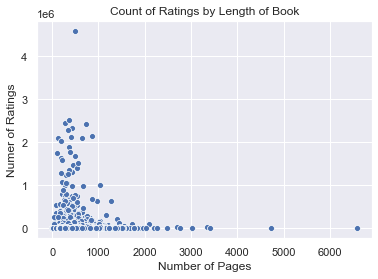

In [5]:
_ = sns.scatterplot('num_pages', 'ratings_count', data=df)
_ = plt.xlabel('Number of Pages')
_ = plt.ylabel('Numer of Ratings')
_ = plt.title('Count of Ratings by Length of Book')
plt.show()

Books with fewer pages tend to have more reviews. In particular, books with around 600 pages or less tend to have many more reivews than book with more pages. This may be attributed to very long books being less commonly published as well as less attractive to readers.  

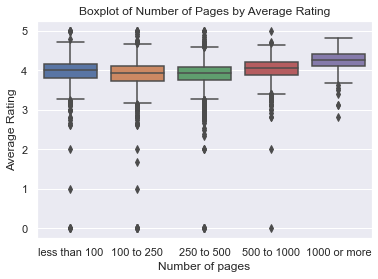

In [12]:
_ = sns.boxplot(x='npg_bins', y='average_rating', data=df, order=['less than 100', '100 to 250', '250 to 500', '500 to 1000', '1000 or more'])
_ = plt.xlabel('Number of pages')
_ = plt.ylabel('Average Rating')
_ = plt.title('Boxplot of Number of Pages by Average Rating')
plt.show()

However, books with more pages also tend to have higher average reviews. For example, there is only one review under a rating of 3 for books with more than 1000 pages. This could mean that longer books are better, but that may not be true given that we already know longer books have fewer ratings on this site.

Additonal Questions: How can we accurately compare books with only a handful of ratings to those with many? What new metric can we use? Consider exploring an average rating normalized by the number of reviews for future research.

## Age of Book

Question: Do books get better with age?

In [8]:
# create a few new variables based on the publication date variable to futher explore relationships
df['pub_year'] = pd.DatetimeIndex(df['publication_date']).year
df['pub_month'] = pd.DatetimeIndex(df['publication_date']).month
df['pub_day'] = pd.DatetimeIndex(df['publication_date']).day

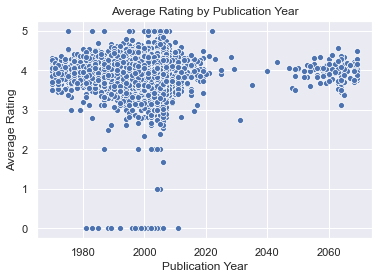

In [9]:
_ = sns.scatterplot('pub_year', 'average_rating', data=df)
_ = plt.xlabel('Publication Year')
_ = plt.ylabel('Average Rating')
_ = plt.title('Average Rating by Publication Year')
plt.show()

Based on this dataset, it appears that books are given more variable reviews with time. In other words, older books appear to be regarded as more enjoyable than more recent books. However, it is important to note that this dataset includes far more books published recently than those published before 1990. Also, curiously, there appear to be review for books published in the future. 

Addtional Questions: How can we accurately compare reviews of older books published before good reads existed? Can we compare these ratings with reviews from an older source like the New York Times?

## Publication Timing

Question: Does time of publication impact online reviews?

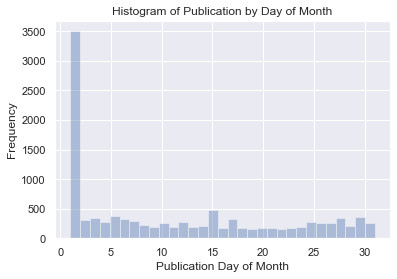

In [14]:
_ = sns.distplot(df['pub_day'].dropna(), kde=False, bins=31)
_ = plt.xlabel('Publication Day of Month')
_ = plt.ylabel('Frequency')
_ = plt.title('Histogram of Publication by Day of Month')
plt.show()

Publishers clearly prefer to release new books on the first of the month. Far more books are published on day 1 than any other day of the month. This may be a strategy for improving sales or it may be easier for publishers to plan and organize book releases by using the same day every month.

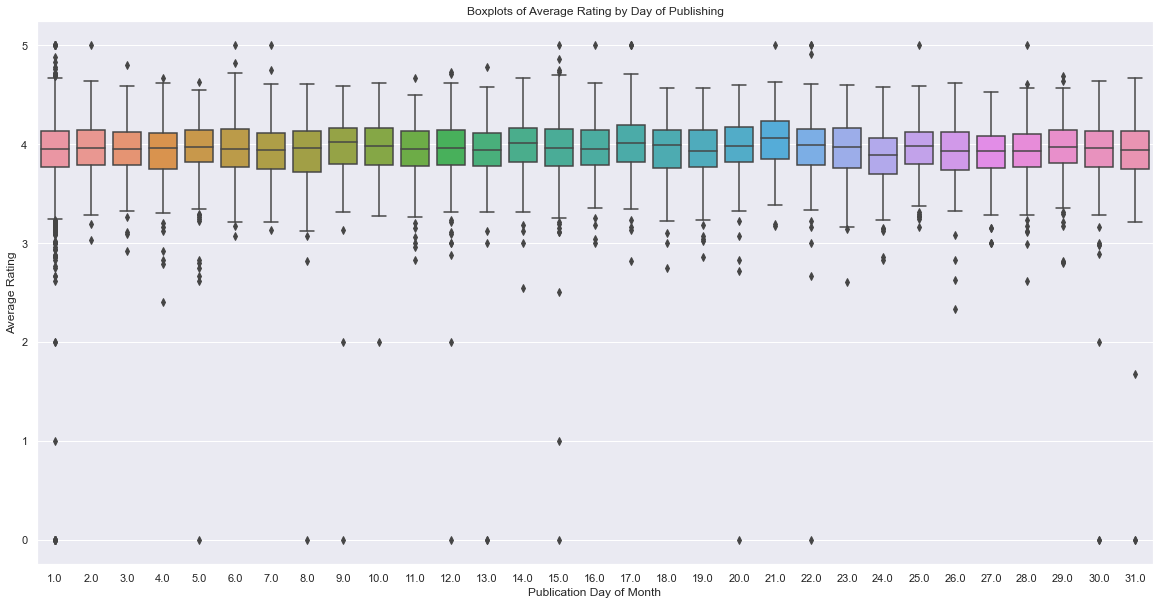

In [25]:
_ = plt.figure(figsize=(20, 10))
_ = sns.boxplot(x='pub_day', y='average_rating', data=df)
_ = plt.xlabel('Publication Day of Month')
_ = plt.ylabel('Average Rating')
_ = plt.title('Boxplots of Average Rating by Day of Publishing')
plt.show()

However, the day of publishing does not seem to translate to any impact in average ratings on goodreads. 

Additional Questions: How do these reviews compare with sales data? What other reasons would publishers have for favoring the beginning of the month for publishing?

## Next Steps

The goodreads dataset provides some insight into patterns of online book reviews. One hypothesis for futher study would be whether this site tends to attract more positive reviewers than other book review platforms. Similarly, does it attract readers who tend to read more recent books over older books. Many additional questions remain.

It would be useful to develop some new variables based on this dataset. For example, a rating metric normalized by the number of ratings. Additionally, there are a many external data sources that may bring further insight when analyzed together with the goodreads data.